In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Input folder
df1 = pd.read_csv(r'..\Step0_dataCollection\Ranked\April_11_data_ranked.csv')
# df2 = pd.read_csv(r'..\Step0_dataCollection\gender_age-Final.csv')
df3 = pd.read_csv(r'..\Step0_dataCollection\county_zipcode_true_ave_ranges.csv')
df4 = pd.read_csv(r'..\Step0_dataCollection\Ranked\Age_Final_ranked.csv')

In [3]:
df1

,County,State,FIPS,Apr11_Cases,Apr11_Deaths,Cases_rank,Cases_scale,Deaths_rank,Deaths_scale
0,Autauga,Alabama,1001,19,1,1577,7,1619,7
1,Baldwin,Alabama,1003,66,1,2077,8,1619,7
2,Barbour,Alabama,1005,10,0,1204,5,1,1
3,Bibb,Alabama,1007,13,0,1369,6,1,1
4,Blount,Alabama,1009,12,0,1319,6,1,1
...,...,...,...,...,...,...,...,...,...
2610,Sublette,Wyoming,56035,1,0,1,1,1,1
2611,Sweetwater,Wyoming,56037,7,0,1000,4,1,1
2612,Teton,Wyoming,56039,53,0,2013,8,1,1
2613,Uinta,Wyoming,56041,4,0,662,3,1,1


In [4]:
df1.rename(columns ={'FIPS': 'fips', 'County': 'county','Cases_scale':'cases_range','Deaths_scale':'deaths_range'}, inplace = True)

In [ ]:
# df2

In [5]:
df3 

,county_fips,county_name,state_id,population,pop_area_est,pop_density,pop_rank,pop_range
0,1001,Autauga,AL,57046,1512.03,37.73,2191,8
1,1003,Baldwin,AL,207694,4077.05,50.94,2367,8
2,1005,Barbour,AL,25278,1821.81,13.88,1287,5
3,1007,Bibb,AL,22859,1415.86,16.14,1437,5
4,1009,Blount,AL,45030,1311.39,34.34,2122,7
...,...,...,...,...,...,...,...,...
3095,56037,Sweetwater,WY,44117,6322.20,6.98,759,3
3096,56039,Teton,WY,22196,6268.00,3.54,469,2
3097,56041,Uinta,WY,20630,3833.92,5.38,621,3
3098,56043,Washakie,WY,8295,3262.25,2.54,373,2


In [6]:
df3.rename(columns = {'county_fips':'fips','county_name':'county','state_id':'state' }, inplace = True)

In [ ]:
# def getImpact(pop_range):
#     if pop_range <=3:
#         impact = "Low"
#     elif pop_range <=6:
#         impact = "Medium"
#     elif pop_range <=9:
#         impact = "High"
#     else:
#         impact = "Critical"
#     return impact

In [ ]:
# df3['impact'] = df3['pop_range'].apply(getImpact)

In [7]:
df3.head()

,fips,county,state,population,pop_area_est,pop_density,pop_rank,pop_range
0,1001,Autauga,AL,57046,1512.03,37.73,2191,8
1,1003,Baldwin,AL,207694,4077.05,50.94,2367,8
2,1005,Barbour,AL,25278,1821.81,13.88,1287,5
3,1007,Bibb,AL,22859,1415.86,16.14,1437,5
4,1009,Blount,AL,45030,1311.39,34.34,2122,7


In [8]:
df = pd.merge(df1,df3, on = ['fips','county'], how = 'inner')

In [9]:
df4

,state,county,fips,over 70,Rank,Scale
0,Alabama,Autauga,1001,10.906279,763,3
1,Alabama,Baldwin,1003,13.899515,1967,7
2,Alabama,Barbour,1005,13.230979,1677,6
3,Alabama,Bibb,1007,11.196429,851,3
4,Alabama,Blount,1009,12.562241,1428,5
...,...,...,...,...,...,...
3104,Wyoming,Sweetwater,56037,7.309935,80,1
3105,Wyoming,Teton,56039,9.644296,426,2
3106,Wyoming,Uinta,56041,8.571851,230,1
3107,Wyoming,Washakie,56043,15.129994,2359,8


In [10]:
df4.rename(columns = {'Scale':'age_range','Rank':'age_rank'}, inplace = True)

In [11]:
df4

,state,county,fips,over 70,age_rank,age_range
0,Alabama,Autauga,1001,10.906279,763,3
1,Alabama,Baldwin,1003,13.899515,1967,7
2,Alabama,Barbour,1005,13.230979,1677,6
3,Alabama,Bibb,1007,11.196429,851,3
4,Alabama,Blount,1009,12.562241,1428,5
...,...,...,...,...,...,...
3104,Wyoming,Sweetwater,56037,7.309935,80,1
3105,Wyoming,Teton,56039,9.644296,426,2
3106,Wyoming,Uinta,56041,8.571851,230,1
3107,Wyoming,Washakie,56043,15.129994,2359,8


In [ ]:
# df_final = pd.merge(df,df2, on = ['fips','county'], how = 'inner')

In [ ]:
# df_final

In [12]:
df = pd.merge(df,df4, on = ['fips','county'], how = 'inner')

In [13]:
df

,county,State,fips,Apr11_Cases,Apr11_Deaths,Cases_rank,cases_range,Deaths_rank,deaths_range,state_x,population,pop_area_est,pop_density,pop_rank,pop_range,state_y,over 70,age_rank,age_range
0,Autauga,Alabama,1001,19,1,1577,7,1619,7,AL,57046,1512.03,37.73,2191,8,Alabama,10.906279,763,3
1,Baldwin,Alabama,1003,66,1,2077,8,1619,7,AL,207694,4077.05,50.94,2367,8,Alabama,13.899515,1967,7
2,Barbour,Alabama,1005,10,0,1204,5,1,1,AL,25278,1821.81,13.88,1287,5,Alabama,13.230979,1677,6
3,Bibb,Alabama,1007,13,0,1369,6,1,1,AL,22859,1415.86,16.14,1437,5,Alabama,11.196429,851,3
4,Blount,Alabama,1009,12,0,1319,6,1,1,AL,45030,1311.39,34.34,2122,7,Alabama,12.562241,1428,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Sublette,Wyoming,56035,1,0,1,1,1,1,WY,9883,9894.89,1.00,136,1,Wyoming,12.880872,1541,5
2572,Sweetwater,Wyoming,56037,7,0,1000,4,1,1,WY,44117,6322.20,6.98,759,3,Wyoming,7.309935,80,1
2573,Teton,Wyoming,56039,53,0,2013,8,1,1,WY,22196,6268.00,3.54,469,2,Wyoming,9.644296,426,2
2574,Uinta,Wyoming,56041,4,0,662,3,1,1,WY,20630,3833.92,5.38,621,3,Wyoming,8.571851,230,1


In [14]:
df['final_range'] = (df['pop_range'] + df['age_range']+ df['cases_range'] + df['deaths_range'])/4

In [15]:
df

,county,State,fips,Apr11_Cases,Apr11_Deaths,Cases_rank,cases_range,Deaths_rank,deaths_range,state_x,population,pop_area_est,pop_density,pop_rank,pop_range,state_y,over 70,age_rank,age_range,final_range
0,Autauga,Alabama,1001,19,1,1577,7,1619,7,AL,57046,1512.03,37.73,2191,8,Alabama,10.906279,763,3,6.25
1,Baldwin,Alabama,1003,66,1,2077,8,1619,7,AL,207694,4077.05,50.94,2367,8,Alabama,13.899515,1967,7,7.50
2,Barbour,Alabama,1005,10,0,1204,5,1,1,AL,25278,1821.81,13.88,1287,5,Alabama,13.230979,1677,6,4.25
3,Bibb,Alabama,1007,13,0,1369,6,1,1,AL,22859,1415.86,16.14,1437,5,Alabama,11.196429,851,3,3.75
4,Blount,Alabama,1009,12,0,1319,6,1,1,AL,45030,1311.39,34.34,2122,7,Alabama,12.562241,1428,5,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Sublette,Wyoming,56035,1,0,1,1,1,1,WY,9883,9894.89,1.00,136,1,Wyoming,12.880872,1541,5,2.00
2572,Sweetwater,Wyoming,56037,7,0,1000,4,1,1,WY,44117,6322.20,6.98,759,3,Wyoming,7.309935,80,1,2.25
2573,Teton,Wyoming,56039,53,0,2013,8,1,1,WY,22196,6268.00,3.54,469,2,Wyoming,9.644296,426,2,3.25
2574,Uinta,Wyoming,56041,4,0,662,3,1,1,WY,20630,3833.92,5.38,621,3,Wyoming,8.571851,230,1,2.00


In [16]:
def getImpact(final_range):
    if final_range <=3:
        impact = "Low"
    elif final_range <=6:
        impact = "Medium"
    elif final_range <=9:
        impact = "High"
    else:
        impact = "Critical"
    return impact

In [17]:
df['impact'] = df['final_range'].apply(getImpact)

In [18]:
df

,county,State,fips,Apr11_Cases,Apr11_Deaths,Cases_rank,cases_range,Deaths_rank,deaths_range,state_x,...,pop_area_est,pop_density,pop_rank,pop_range,state_y,over 70,age_rank,age_range,final_range,impact
0,Autauga,Alabama,1001,19,1,1577,7,1619,7,AL,...,1512.03,37.73,2191,8,Alabama,10.906279,763,3,6.25,High
1,Baldwin,Alabama,1003,66,1,2077,8,1619,7,AL,...,4077.05,50.94,2367,8,Alabama,13.899515,1967,7,7.50,High
2,Barbour,Alabama,1005,10,0,1204,5,1,1,AL,...,1821.81,13.88,1287,5,Alabama,13.230979,1677,6,4.25,Medium
3,Bibb,Alabama,1007,13,0,1369,6,1,1,AL,...,1415.86,16.14,1437,5,Alabama,11.196429,851,3,3.75,Medium
4,Blount,Alabama,1009,12,0,1319,6,1,1,AL,...,1311.39,34.34,2122,7,Alabama,12.562241,1428,5,4.75,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,Sublette,Wyoming,56035,1,0,1,1,1,1,WY,...,9894.89,1.00,136,1,Wyoming,12.880872,1541,5,2.00,Low
2572,Sweetwater,Wyoming,56037,7,0,1000,4,1,1,WY,...,6322.20,6.98,759,3,Wyoming,7.309935,80,1,2.25,Low
2573,Teton,Wyoming,56039,53,0,2013,8,1,1,WY,...,6268.00,3.54,469,2,Wyoming,9.644296,426,2,3.25,Medium
2574,Uinta,Wyoming,56041,4,0,662,3,1,1,WY,...,3833.92,5.38,621,3,Wyoming,8.571851,230,1,2.00,Low


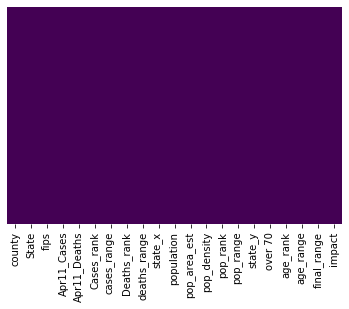

In [19]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [20]:
Highest_impact = df.groupby('impact').nunique()['county']

In [21]:
Highest_impact

impact
Critical     28
High        571
Low         277
Medium      949
Name: county, dtype: int64

In [22]:
counties = df.loc[df['impact'] =='Critical']

In [23]:
counties

,county,State,fips,Apr11_Cases,Apr11_Deaths,Cases_rank,cases_range,Deaths_rank,deaths_range,state_x,...,pop_area_est,pop_density,pop_rank,pop_range,state_y,over 70,age_rank,age_range,final_range,impact
171,Marin,California,6041,153,10,2312,9,2409,10,CA,...,1033.09,251.04,2908,10,California,15.358961,2425,8,9.25,Critical
264,Middlesex,Connecticut,9007,290,18,2421,10,2488,10,CT,...,933.99,174.07,2836,10,Connecticut,13.943153,1985,7,9.25,Critical
271,Sussex,Delaware,10005,404,10,2467,10,2409,10,DE,...,2860.06,80.22,2581,9,Delaware,18.352189,2884,10,9.75,Critical
277,Brevard,Florida,12009,123,3,2265,9,2157,9,FL,...,2030.53,284.40,2931,10,Florida,16.813465,2707,9,9.25,Critical
280,Charlotte,Florida,12015,112,5,2245,9,2293,9,FL,...,1956.02,90.12,2623,9,Florida,29.439778,3107,10,9.25,Critical
283,Collier,Florida,12021,352,4,2452,10,2247,9,FL,...,4252.65,85.46,2599,9,Florida,24.598402,3091,10,9.50,Critical
298,Hernando,Florida,12053,69,2,2099,9,1990,8,FL,...,1146.94,153.73,2800,10,Florida,19.987426,2996,10,9.25,Critical
306,Lake,Florida,12069,150,4,2308,9,2247,9,FL,...,2979.04,118.25,2713,9,Florida,19.466472,2968,10,9.25,Critical
307,Lee,Florida,12071,597,16,2504,10,2478,10,FL,...,2453.35,292.54,2938,10,Florida,20.808232,3030,10,10.00,Critical
312,Manatee,Florida,12081,221,13,2377,10,2447,10,FL,...,2063.82,182.72,2843,10,Florida,19.834623,2989,10,10.00,Critical


In [24]:
counties_high = df.loc[df['impact'] =='High']

In [25]:
counties_high = df.loc[df['county'] =='Hunterdon']

In [26]:
counties_high

,county,State,fips,Apr11_Cases,Apr11_Deaths,Cases_rank,cases_range,Deaths_rank,deaths_range,state_x,...,pop_area_est,pop_density,pop_rank,pop_range,state_y,over 70,age_rank,age_range,final_range,impact
1472,Hunterdon,New Jersey,34019,301,11,2427,10,2423,10,NJ,...,1104.79,115.55,2704,9,New Jersey,12.321792,1320,5,8.5,High


In [27]:
df.drop(columns = ['state_x','state_y'], inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576 entries, 0 to 2575
Data columns (total 19 columns):
county          2576 non-null object
State           2576 non-null object
fips            2576 non-null int64
Apr11_Cases     2576 non-null int64
Apr11_Deaths    2576 non-null int64
Cases_rank      2576 non-null int64
cases_range     2576 non-null int64
Deaths_rank     2576 non-null int64
deaths_range    2576 non-null int64
population      2576 non-null int64
pop_area_est    2576 non-null float64
pop_density     2576 non-null float64
pop_rank        2576 non-null int64
pop_range       2576 non-null int64
over 70         2576 non-null float64
age_rank        2576 non-null int64
age_range       2576 non-null int64
final_range     2576 non-null float64
impact          2576 non-null object
dtypes: float64(4), int64(12), object(3)
memory usage: 402.5+ KB


In [ ]:
# sns.lmplot(x= 'population', y = 'cases', data = df_final)

In [ ]:
# df = df.get_dummies['']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop(['impact','county','State','population','Cases_rank','cases_range','Deaths_rank','deaths_range','pop_area_est','pop_density','pop_rank','pop_range','over 70','age_rank','age_range'],axis=1)
y = df['impact']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42, stratify = y)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()

ValueError: could not convert string to float: 'Medium'

In [ ]:
# from sklearn.svm import SVC

In [ ]:
# svc_model = SVC(kernel = 'linear')
# svc_model.fit(X_train,y_train)

In [ ]:
# svc_model.score(X_train_scaled, y_train)
# svc_model.score(X_test_scaled, y_test)

In [ ]:
# print(f"Training Data Score: {svc_model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {svc_model.score(X_test_scaled, y_test)}")

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C':[1,5,10], 'gamma':[0.0001,0.001,0.01]}
# grid_svc = GridSearchCV(svc_model, param_grid, verbose = 3)

In [ ]:
# grid_svc.fit(X_train_scaled, y_train)

In [ ]:
# print(grid_svc.best_params_)
# print(grid_svc.best_score_)

In [32]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model_lr.score(X_train_scaled, y_train)
model_lr.score(X_test_scaled, y_test)

0.9184993531694696

In [34]:
print(f"Training Data Score: {model_lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.906267332224071
Testing Data Score: 0.9184993531694696


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,5,10], 'penalty':['l2']}
grid_lr = GridSearchCV(model_lr, param_grid)

In [36]:
grid_lr.fit(X_train_scaled, y_train)

C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\meghn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 5, 'penalty': 'l2'}
0.9267886855241264
